# 퍼셉트론

## 퍼셉트론이란?
- 다수의 신호를 입력으로 받아 하나의 신호를 출력
- 신호 = 흐름을 만들고 정보를 앞으로 전달, 1 = 신호가 흐른다, 0 = 신호가 흐르지 않는다
- 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력 = 뉴런이 활성화한다고 표현하기도 함
- $\theta$(세타) = 임계값, 정해진 한계
- 퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여
- $w$(가중치) = 각 신호가결과에 주는 영향력을 조절하는 요소, 가중치가 높을 수록 중요한 신호

## 단순한 논리 회로

### AND 게이트
- AND 게이트 = 입력이 둘 출력은 하나, 두 입력이 모두 1일 때만 1을 출력하고, 그 외에는 0을 출력
- 진리표 = 입력 신호와 출력 신호의 대응 표

### NAND 게이트와 OR 게이트
- NAND = Not AND, AND 게이트의 출력을 뒤집은 것처럼 동작, 두 입력이 모두 1일 때만 0 출력, 그 외에는 1 출력
- AND 게이트를 구현하는 매개변수의 부호를 모두 반전하면 NAND 게이트가 된다
- OR 게이트는 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로
- 퍼셉트론으로 AND, NAND, OR 논리 회로를 표현할 수 있으나, 퍼셉트론의 구조는 모두 똑같다
- 다른 것은 매개변수(가중치와 임계값)의 값뿐이다, 똑같은 구조의 퍼셉트론이 매개변수의 값만 적절히 조정한 것

## 퍼셉트론 구현하기

### 간단한 구현부터

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2 # 가중치를 곱한 입력의 총 합
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [2]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


### 가중치와 편향 도입

In [3]:
import numpy as np
x = np.array([0, 1]) # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7 # 편향
print(w*x) # 넘파이 배열끼리의 곱셈은 원소 수가 같아면 각 원소끼리 곱한다
print(np.sum(w*x)) # np.sum()메서드는 입력한 배열에담긴 모든 원소의 총합을 계산
print(np.sum(w*x) + b) # 이 가중치에 편향을 더하면 계산 완료

[0.  0.5]
0.5
-0.19999999999999996


### 가중치와 편향 구하기

In [4]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

- 가중치 = 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수
- $b$(편향) = 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수
- $b$가 -0.1일 경우 각 입력 신호에 가중치를 곱한 값들의 합이 0.1을 초과할 때만 뉴런이 활성화
- $w$(가중치), $b$(편향)으로 구별하기도 하지만 모두 가중치라고 하기도 함

In [5]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # AND와는 가중치(w와 b)만 다르다
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2  # AND와는 가중치(w와 b)만 다르다
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## 퍼셉트론의 한계

### 도전! XOR 게이트
- XOR 게이트 = 배타적 논리합이라는 논리 회로
- XOR 게이트는 직선 하나로 나눌 수 없음

### 선형과 비선형
- 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있다

## 다층 퍼셉트론이 출동한다면
- 층을 쌓아 다층 퍼셉트론을 만들 수 있다

### 기존 게이트 조합하기
- 단층 퍼셉트론으로는 XOR 게이트를 표현할 수 없다, 단층 퍼셉트론으로는 비선형 영역을분리할 수 없다
- 각 입력 신호가 NAND와 OR 게이트의 입력이 되고, NAND와 OR의 출력이 AND 게이트의 입력으로 이어진다

### XOR 게이트 구현하기

In [6]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [7]:
print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0


- XOR은 2층 퍼셉트론, 이처럼 층이 여러개인 퍼셉트론을 다층 퍼셉트론이라 한다
- 단층 퍼셉트론으로 표현하지 못한 것을 층을 하나 늘리면 구현 가능

## NAND 에서 컴퓨터까지
- 이론상 2층 퍼셉트론이면 컴퓨터를 만들 수 있다
- 퍼셉트론은 층을 거듭 쌓으면 비선형적인 표현도 가능하고, 이론상 컴퓨터가 수행하는 처리도 모두 표현할 수 있다

## 정리
- 퍼셉트론은 입출력을 갖춘 알고리즘으로 입력을 주면 정해진 규칙에 따른 값을 출력
- 퍼셉트론에서는 가중치와 편향을 매개변수로 설정
- 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다
- 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다
- 다층 퍼셉트론은 이론상 컴퓨터를 표현할 수 있다

# 신경망

## 퍼셉트론에서 신경망으로

### 신경망의 예
- 입력층, 은닉층, 출력층으로 구성
- 은닉층의 뉴런은 사람의 눈에는 보이지 않는다
- 뉴련이 연결되는 방식은 퍼셉트론과 같ㅌ다

### 퍼셉트론 복습
- $x_1, x_2$라는 두 신호를 입력받나 $y$를 출력하는 퍼셉트론
    - $y = \begin{cases}0(b+w_1x_1+w_2x_2\leq0) \\ 1(b+w_1x_1+w_2x_2\gt0)\end{cases}$
- 여기서 $b$을 명시할 경우 입력이 1인 뉴런이 추가된다, 편향의 입력 신호는 항상 1
- 조건 분기의 동작(0을 넘으면 1, 그렇지 않으면 0을 출력)을 $h(x)$라는 하나의 함수로 표현
    - $y = h(b+w_1x_1+w_2x_2)$
    - $h(x) = \begin{cases}0(x\leq0) \\ 1(x\gt0) \end{cases}$
    - 입력 신호의 총합이 $h(x)$라는 함수를 거쳐 변환되어, 그 변환된 값이 $y$의 출력이 된다

### 활성화 함수의 등장
- $h(x)$처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 호라성화 함수라 한다
- 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지 정하는 역할
- 가중치가 곱해진 입력 신호의 총합을 계산하고, 그 합을 활성화 함수에 입력해 결과를 내는 2단계로 처리된다
    - $a = b+w_1x_1+w_2x_2$
    - $y = h(a)$
    - 가중치가 달린 입력 신호와 편향의 총합을 계산한 $a$를 함수 $h()$에 넣어 $y$를 출력
- 가중치 신호를 조합한 결과가 $a$라는 노드가 되고, 활성화 함수 $h()$를 통과하여 $y$라는 노드로 변환되는 과정

## 활성화 함수
- 계단 함수 = 임계값을 경계로 출력이 바뀌는 활성화 함수

### 시그모이드 함수
- 시그모이드 함수를 나타낸 식
    - $h(x) = \frac{1}{1+exp(-x)}$
    - $exp(-x)$는 $e^-x$를 뜻하며 $e$는 자연상수로 2.7182..의 값을 가지는 실수
    - 시그모이드 함수에 1.0과 2.0을 입력하면 $h(1.0) = 0.731...$, $h(2.0) = 0.880...$처럼 특정 값을 출력
- 신경망에서 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴턴에 전달
- 퍼셉트론과 신경망의 주된 차이는 활성화 함수, 그 외 뉴런이 여러 층으로 이어지는 구조와 전달하는 방법은 기본적으로 퍼셉트론과 같다

### 계단 함수 구현하기

In [8]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

- 인수 x는 실수(부동소수점)만 받아들인다

In [9]:
def step_function(x):
    y = x> 0
    return y.astype(np.int)

- 넘파이 배열도 지원하도록 수정한 것

In [10]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x>0
print(y)

[-1.  1.  2.]
[False  True  True]


- 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성된다
- 배열 x의 원소 각각이 0보다 크면 True, 0 이하면 False로 변환한 새로운 배열 y가 생성된다

In [11]:
y = y.astype(np.int)
print(y)

[0 1 1]


C:\Users\lbw\AppData\Local\Temp\ipykernel_28888\4147947644.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


- 계단 함수는 0이나 1의 int형을 출력하는 함수기에 배열 y의 원소를 bool에서 int형으로 바꾼다
- astype()메서드로 배열의 자료형 변환
- bool을 int로 변환하면 True 는 1, False 는 0으로 변환

### 계단 함수의 그래프

C:\Users\lbw\AppData\Local\Temp\ipykernel_28888\739440373.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


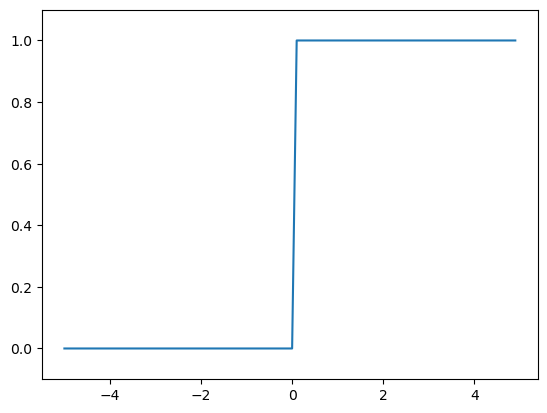

In [12]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 축의 범위 지정
plt.show()

- np.arange(-5.0, 5.0, 0.1)은 -5.0에서 5.0까지 0.1 간격의 넘파이 배열을 생성
- step_function()은 인수로 받은 넘파이 배열의 원소 각각을 인수로 계단 함수를 실행해, 그 결과를 다시 배열로 만들어 돌려준다
- 그래프처럼 계단 함수는 0을 경계로 출력이 0에서 1(또는 1에서 0)로 바뀐다, 그 형태가 계단 같아서 계단 함수라 불린다

### 시그모이드 함수 구현하기

In [13]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [14]:
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


- 넘파이 배열이 처리 가능한 이유는 넘파이의 브로드캐스트 때문
- 브로드캐스트 기능 = 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것

In [15]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


- 스칼라값 1.0과 넘파이 배열 사이에서 수치 연산을 한 것
- 결과적으로 스칼라값과 넘파이 배열의 각 원소 사이에서 연산이 이뤄지고, 연산 결과가 넘파이 배열로 출력

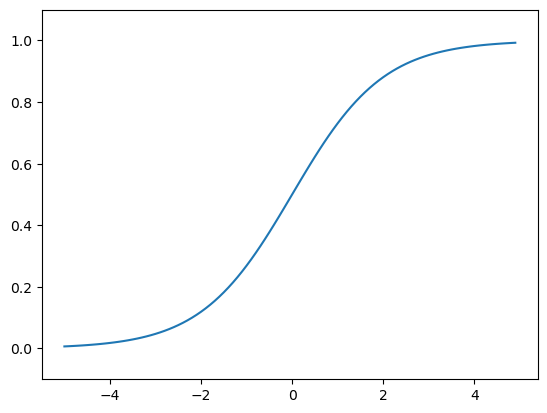

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 축 범위 지정
plt.show()

### 시그모이드 함수와 계단 함수 비교
- 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화, 계단 함수는 0을 경계로 출력이 갑자기 바뀐다
- 계단 함수가 0과 1 중 하나의 값만 돌려주는 반면, 시그모이드 함수는 실수를 돌려준다
- 퍼셉트론에서는 뉴련 사이에 0 혹은 1이 흘럿다면, 신경망에서는 연속적인 실수가 흐른다
- 두 함수 모두 입력이 작을 때의 출력은 0에 가깝고, 입력이 커지면 출력이 1에 가까워지는 구조
- 입력이 중요하면 큰 값을 출력 그렇지 않으면 작은 값 출력, 입력이 아무리 크거나 작아도 출력은 0에서 1 사이

### 비선형 함수
- 계단 함수와 시그모이드 함수 모두 비선형 함수
- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다, 선형 함수를 이용할 경우 신경망의 층을 깊게 하는 의미가 없어지기 때문


### ReLU 함수
- 0이 넘으면 그 입력을 그대로 출력하고, 0이하이면 0을 출력하는 함수
- $h(x) = \begin{cases}x(x\gt0) \\ 0(x\leq0) \end{cases}$

In [17]:
def relu(x):
    return np.maximum(0, x)

- maximum은 두 입력 중 큰 값을 선택해 반환하는 함수

## 다차원 배열의 계산

### 다차원 배열
- 다차원 배열 = 숫자의 집합

In [18]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A)) # 배열의 차원 수
print(A.shape) # 배열의 형상, 튜플로 반환
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [19]:
B = np.array([[1, 2], [3, 4], [5, 6]]) # 3*2 배열
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


- 2차원 배열 = 행렬, 가로 방향을 행, 세로 방향을 열이라고 한다

### 행렬의 곱
- 왼쪽 행렬의 행과 오른쪽 행렬의 열을 원소별로 곱하고 그 값들을 더해서 계산

In [20]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


- np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열리면 행렬 곱을 계산

In [21]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
print(np.dot(A, B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


- 행렬의 형상에 주의, 왼쪽 행렬 1번째 차원의 원소 수(열 수)와 오른쪽 행렬의 0번째 차원의 원소 수(행 수)가 같아야 한다

In [22]:
C = np.array([[1, 2], [3, 4]])
print(C.shape)
print(A.shape)
# print(np.dot(A, C)) 차원의 원소 수 불일치

(2, 2)
(2, 3)


- 다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 한다
- 2차원 행렬과 1차원 배열도 대응하는 차원의 원소의 수를 일치시켜야 한다

In [23]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
B = np.array([7,8])
print(B.shape)
print(np.dot(A, B))

(3, 2)
(2,)
[23 53 83]


### 신경망에서의 행렬 곱

In [24]:
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
Y = np.dot(X, W) # 다차원 배열의 스칼라곱을 구해주는 함수
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3층 신경망 구현하기
- 넘파이 배열을 잘 쓰면 아주 적은 코드만으로 신경망의 순방향 처리를 완성할 수 있다

### 각 층의 신호 전달 구현하기

In [25]:
X = np.array([1.0, 0.5]) # 입력
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 0층의 가중치
B1 = np.array([0.1, 0.2, 0.3]) # 0층의 편향

# 대응하는 차원의 원소 수
print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1 # 1층 뉴런으로 전달된 가중치 합


(2, 3)
(2,)
(3,)


In [26]:
Z1 = sigmoid(A1) # 넘파이 배열을 받아 같은 수의 원소로 구성된 넘파이 배열 반환

print(A1)
print(Z1) # 1층의 출력, 2층의 입력

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [27]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # 1층의 가중치
B2 = np.array([0.1, 0.2]) # 1층의 편향

# 대응하는 차원의 원소 수
print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2 # 2층으로 전달된 가중치 합
Z2 = sigmoid(A2) # 2층에 출력, 출력층으로 전달

(3,)
(3, 2)
(2,)


In [28]:
def identity_function(x): # 항등 함수, 입력을 그대로 출력
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]]) # 2층의 가중치
B3 = np.array([0.1, 0.2]) # 2층의 편향

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y + A3

### 구현 정리

In [29]:
def init_network(): # 가중치와 편향 초기화 후 딕셔너리 변수인 network에 저장
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x): # 입력 신호를 출력으로 변환하는 처리 과정 모두 구현, 순방향(순전파)
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 출력층 설계하기
- 신경망은 븐루와 회귀 모두에 이용 가능, 일반적으로 회귀에는 항등 함수, 분류에는 소프트맥스 함수 사용

### 항등 함수와 소프트맥스 함수 구현하기
- 항등 함수 = 입력을 그대로 출력
- 소프트맥스 함수 = $y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}$
    - $exp(x)$는 $e^x$을 뜻하는 지수 함수, $e$는 자연상수, $n$은 출력층의 뉴런 수, $y_k$는 그중 $k$번째 출력임을 뜻한다
    - 소프트맥스 함수의 분자는 입력신호 $a_k$의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성된다

In [30]:
a = np.array([0.3, 2.0, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881  7.3890561  54.59815003]
63.33706493965089
[0.0213123  0.11666243 0.86202526]


In [31]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수 구현 시 주의점
- 컴퓨터로 계산할 때는 오버플로 문제라는 결함이 있다
- 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수는 쉽게 아주 큰 값을 내뱉고 이런 큰 값끼리 나눗셈을 하면 결과 수치가 불안정해진다
- 문제를 해결하도록 개선한 수식
    - $y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)} = \frac{Cexp(a_k)}{C\sum_{i=1}^{n}exp(a_i)} \\
    \quad\quad\quad\quad\quad\quad\quad= \frac{exp(a_k+logC)}{\sum_{i=1}^{n}exp(a_i+logC)} \\
    \quad\quad\quad\quad\quad\quad\quad= \frac{exp(a_k+C')}{\sum_{i=1}^{n}exp(a_i+C')}$
    - $C$라는 임의의 정수를 분자와 분모 양쪽에 곱하고 $C$를 지수 함수 $exp()$안으로 옮겨 $logC$로 만든 후에 $C'$라는 새로운 기호로 바꾼다
    - 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과가 바뀌지 않는다
    - $C'$에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적

In [32]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a))) # 소프트맥스 함수의 계산, 제대로 계산되지 않는다

c = np.max(a) # c = 1010(최댓값)
print(a - c)

print(np.exp(a - c) / np.sum(np.exp(a - c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


C:\Users\lbw\AppData\Local\Temp\ipykernel_28888\3550095242.py:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a))) # 소프트맥스 함수의 계산, 제대로 계산되지 않는다
C:\Users\lbw\AppData\Local\Temp\ipykernel_28888\3550095242.py:2: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a) / np.sum(np.exp(a))) # 소프트맥스 함수의 계산, 제대로 계산되지 않는다


In [33]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수의 특징

In [34]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


- 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수, 출력의 총합은 1
- 출력 총합이 1이 된다는 점으로 확률로 해석할 수 있다
- 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다, 지수 함수 $y = exp(x)$가 단조 증가 함수이기 때문이다
- 신경망을 이용한 분류에서는 지수 함수 계산에 드는 자원 낭비를 줄이기 위해 출력층의 소프트맥스 함수를 생략하는 것이 일반적

### 출력층의 뉴런 수 정하기
- 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적

## 손글씨 숫자 인식
- 추론 과정을 신경망의 순전파라고도 한다

### MNIST 데이터셋

In [35]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)
    
# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


- load_mnist함수는 데이터를 (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)형식으로 반환
    - normalize = 픽셀값 0.0~1.0 사이의 값으로 정규화
    - flatten = 1차원 배열화
    - one_hot_label = 레이블을 원-핫 인코딩 형태로 저장

In [36]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


- flatten=True로 설정해 읽어 들인 이미지는 1차원 넘파이 배열로 저장되어 있기 때문에 reshape()메서드로 배열의 형상을 변환하고 Image.fromarray()로 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야 한다

### 신경망의 추론 처리
- 입력층 뉴련 784개, 출력층 뉴런 10개로 구성된 추론을 수행하는 신경망 구현
    - 입력층 뉴런 수는 이미지 크기가 28 * 28 = 784이기 때문
    - 출력층 뉴런 수는 0에서 9까지의 숫자를 구분하는 문제이기 때문
- 은닉층은 1층은 50, 2층은 100개의 뉴런 배치, 임의로 정한 값

In [37]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist( normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

- init_network()에서 pickle파일인 sample_weight.pkl에 저장된 학습된 가중치 매개변수를 읽는다, 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다

In [38]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


- MNIST데이터셋을 얻고 네트워크 생성
- for문을 돌며 x에 저장된 이미지 데이터를 1장씩 꺼내 predict()함수로 분류
- predict()함수는 각 레이블의 확률을 넘파이 배열로 반환
- 넘파이 배열은 이미지가 0부터 9까지 숫자일 확률
- np.argmax()함수로 배열에서 값이 가장 큰 원소의 인덱스를 구하는 것이 예측 별과
- 예측한 답변과 정답 레이블을 비교하여 맞힌 숫자를 세고, 이를 전체 이미지 숫자로 나눠 정확도를 구한다
- 데이터를 특정 범위로 변환하는 처리를 정규화라 하고, 신경망의 입력 데이터의 특정 변환을 가하는 것을 전처리라 한다
- 전체 데이터를 균일하게 분포시키는 데이터 백색화

### 배치 처리

In [39]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


- 다차원 배열의 대응하는 차원의 원소 수가 일치함
- 데이터를 1장만 입력했을 때 처리 흐름 = X:784, W1:784*50, W2:50*100, W3:100*10, y:10
- 이미지 100장 분량의 데이터의 처리 흐름 = X:100*784, W1:784*50, W2:50*100, W3:100*10, y:100*10
- x[0], y[0]은 추론 결과, x[1], y[1]에는 1번째의 이미지와 그 결과가 저정된다
- 배치 = 하나로 묶은 입력 데이터
- 배치 처리를 수행함으로써 큰 배열로 이뤄진 계산을 하게 되는데, 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠르다

In [40]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


- range()함수가 반환하는 반복자를 바탕으로 x[i:i+batch_size]에서 입력 데이터를 묶는다
- argmax()함수로 최댓값의 인덱스를 가져오는데 axis=1이라는 인수로 100*10의 배열 중 1번째 차원을 구성하는 각 원소에서 최댓값의 인덱스를 찾도록 한 것

In [41]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


- 배치 단위로 분류한 결과를 실제 답과 비교하기 위해 == 연산자를 사용해 넘파이 배열끼리 비교하여 True/False로 구성된 bool 배열을 만들고, 이 결과 배열에서 True가 몇 개인지 센다

In [42]:
x = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
print(np.sum(y==t))

[ True  True False  True]
3


## 정리
- 신경망은 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 앞 장의 퍼셉트론과 같으나 다음 뉴런으로 갈 때 신호를 변화시키는 활성화 함수에 큰 차이가 있다
- 신경망에서는 매끄럽게 변화하는 시그모이드 함수, 퍼셉트론에서는 갑자기 변화하는 계단 함수를 활성화 함수로 사용
- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현 가능
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 잇다
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다

# 신경망 학습
- 학습 = 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 손실 함수 = 신경망이 학습할 수 있도록 해주는 지표
- 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 목표
- 함수의 기울기를 활용하는 경사법 = 손실 함수의 값을 가급적 작게 만드는 기법

## 데이터에서 학습한다!
- 신경망의 특징은 데이터를 보고 학습할 수 있다는 점
- 데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻

### 데이터 주도 학습
- 신경망은 이미지를 있는 그대로 학습
- 딥러닝을 종단간 기계학습이라고도 한다, 데이터(입력)에서 목표한결과(출력)를 사람의 개입 없이 얻는다는 뜻
- 신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점
- 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 end-to-end로 학습할 수 있다

### 훈련 데이터와 시험 데이터
- 기계학습 문제는 데이터를 훈련 데이터와 시험 데이터로 나눠 학습과 실험을 수행하는 것이 일반적
- 훈련 데이터만 사용하여 학습하면서 최적의매개변수를 찾고 시험 데이터를 사용하여 앞서훈련한 모델의 실력을 평가
- 훈련 데이터와 시험 데이터를 분리하는 이유 = 범용적으로 사용할 수 있는 모델을 원하기 때문에 범용 능력을 제대로 평가하기 위해 분리
- 범용 능력 = 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력
- 범용 능력을 획득하는 것이 기계학습의 최종 목표
- 오버피팅 = 한 데이터셋에만 지나치게 최적화된 상태, 이것을 피하는 것이 기계학습의 중요한 과제

## 손실 함수
- 손실 함수를 기준으로 최적의 매개변수 값을 탐색
- 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용

### 오차제곱합
- 가장 많이 쓰이는 손실 함수
- $E = \frac{1}{2}\sum_k(y_k-t_k)^2$
    - $y_k$는 신경망의 출력9신경망이 추정한 값), $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타냄
- 원-핫 인코딩 = 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법

In [43]:
def sum_squares_error(y, t): # 오차제곱합
    return 0.5 * np.sum((y-t)**2)

In [44]:
# 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 정답이 2일 확률 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# 추정과 정답 레이블의 오차
print(sum_squares_error(np.array(y), np.array(t)))

# 정답이 7일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
# 추정과 정답 레이블의 오차
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


### 교차 엔트로피 오차
- $E = -\sum_kt_klogy_k$
    - $log$는 밑이 $e$인 자연로그($log_e$), $y_k$는 신경망의출력, $t_k$는 정답 레이블
    - $t_k$는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0(원-핫 인코딩)
    - 정답일 때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하는 식
- 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다

In [45]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

- y와 t는 넘파이 배열
- np.log를 계산할 때 delta를 더한 이유는 np.log()함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없기 때문에 아주 자가은 값을 더해 절대 0이 되지 않도록 한 것

In [46]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


- 오차 값이 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단

### 미니배치 학습
- 기계학습 문제는 훈련 데이터를 사용해 학습한
- 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아낸다
- 모든 훈련 데이터로부터 계산한 손실 함수 값들의 합을 지표로 삼는다
- 교차 엔트로피 오차 = $E = -\frac{1}{N}\sum_n\sum_kt_{nk}logy_{nk}$
    - 데이터가 $N$개라면 $t_{nk}$는 $n$번째 데이터의 $k$번째 값을 의미($y_{nk}$는 신경막의 출력, $t_{nk}$는 정답 레이블)
    - 마지막에 $N$으로 나누어 평균 손실함수를 구한다
- 미니배치 학습 = 많은 데이터를 대상으로 할 경우 일부만 골라 학습을 수행하는 것

In [47]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
        load_mnist( normalize=True, one_hot_label=True) # 정답 위치의 원소만 1이고 나머지는 0
        
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [48]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

- np.random.choice()로는 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낼 수 있다, 이 함수로 출력한 배열을 미니배치로 뽑아낼 데이터의 인덱스로 사용

In [49]:
print(np.random.choice(60000, 10)) # 0 이상 60000 미만의 수 중에서 무작위로 10개

[47464  1011 16539 19455 39945 48062 53940  6214  3992 22700]


### (배치용) 교차엔트로피 오차 구현하기

In [50]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

- y는 신경망의 출력, t는 정답 레이블
- y가 1차원이라면, 즉 데이터 하나당 교차엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 바꾸고 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산

In [51]:
# 정답 레이블이 원-핫 인코딩이 아닌 숫자 레이블로 주어졌을 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

- 원-핫 인코딩일 때 t가 0인 원소는 교차엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다, 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다
- np.arange(batch_size)는 0부터 batch_size - 1까지 배열을 생성, [0, 1, 2, 3, 4]
- t에는 레이블이 [2, 7, 0, 9, 4]
- y[np.arange(batch_size), t]는 [y[0, 2], y[1, 7], y[2, 0], [3, 9], y[4, 4]]인 넘파이 배열 생성

### 왜 손실 함수를 설정하는가?
- 높은 정확도를 끌어내는 매개변수를 찾는 것 대신 손실 함수의 값이라는 우회적인 방법을 선택하는 이유
- 신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 간으한 작게 하는 매개변수 값을 찾는다, 이때 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복
- 가중치 매개변수의 손실 함수의 미분이란 가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나라는 의미
- 만약 이 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다, 반대로 양수일 경우 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다
- 미분 값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않기 때문에 가중치 매개변수의 갱신은 거기서 멈춘다
- 정확도를 지표로 삼아서는 안 되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문
- 신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다
- 매개변수를 약간만 조정해서는 정확도가 개선되지 않고 일정하게 유지된다, 개선된다 하더라도 그 값은 연속적인 변화보다는 불연속적인 띄엄띄엄한 값으로 바뀌어버린다
- 정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다, 이는 계단 함수를 활성화 함수로 사용하지 않는 이유와도 들어맞는다
- 시그모이드 함수의 미분은 출력이 연속적으로 변하고 곡선의 기울기도 연속적으로 변하기 때문에 어느 장소라도 0이 되지는 않는다
- 기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습할 수 있는 것

## 수치 미분
- 경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정한다

### 미분
- 특정 순간의 변화량
- $\frac{df(x)}{dx} = \lim_{h\rarr0}\frac{f(x+h)-f(x)}{h}$
    - 좌변은 $f(x)$의 $x$에 대한 미분($x$에 대한 $f(x)$의 변화량)을 나타내는 기호
    - $x$의 작은 변화가 함수 $f(x)$를 얼마나 변화시키느냐를 의미
    - 이때 시간을 뜻하는 $h$를 한없이 0에 가깝게 한다는 의미를 $\lim_{h\rarr0}$로 나타낸다

In [52]:
# 나쁜 구현의 예
def numericla_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

- 1e-50은 소수점 아래 0이 50개라는 뜻, 이 방식은 반올림 오차 문제를 일으킨다
- 반올림 오차는 작은 값(가령 소수점 8자리 이하)이 생략되어 최종 계산 결과에 오차가 생기게 한다

In [53]:
print(np.float32(1e-50))

0.0


- 위와 같이 1e-50을 float32형(32비트 부동소수점)으로 나타내면 0.0이 되어, 올바로 표현할 수 없다
- h로 $10^-4$정도의 값을 사용하면 좋은 결과를 얻는다고 알려져 있다
- x + h와 x 사이의 함수 f의 차분을 계산하고 있지만, 에당초 이 계산에는 오차가 있다
- 진정한 미분은 x 위치의 함수의 기울기(이를 접선이라 함)에 해당하지만, 이번 구현에 미분은 (x + h)와 x 사이의 기울기에 해당한다
- 이 차이는 h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계
- 수치 미분에는 오차가 포함된다, 이 오차를 줄이기 위해 (x + h)와 (x - h)일 때의 함수 f의 차분을 계산하는 방법을 사용하기도 한다, 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심 차분 혹은 중앙 차분이라 한다((x + h)와 x의 차분은 전방 차분이라 한다)

In [54]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

- 아주 작은 차분으로 미분하는 것을 수치 미분이라 한다
- 수식을 전개해 미분하는 것을 해석적이라는 말을 이용하여 해석적 해 혹은 해석적으로 미분하다 등으로 표현, $y=x^2$의 미분은 해석적으로는 $\frac{dy}{dx}=2x$로 풀어낼 수 있다, 그래서 $x=2$일 때 $y$의 미분은 4가 된다
- 해석적 미분은 오차를 포함하지 않는 진정한 미분 값을 구해준다

### 수치 미분의 예
- 수치 미분을 사용해 간단한 함수 미분
- 2차 함수 = $y = 0.01x^2+0.1x$

In [55]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

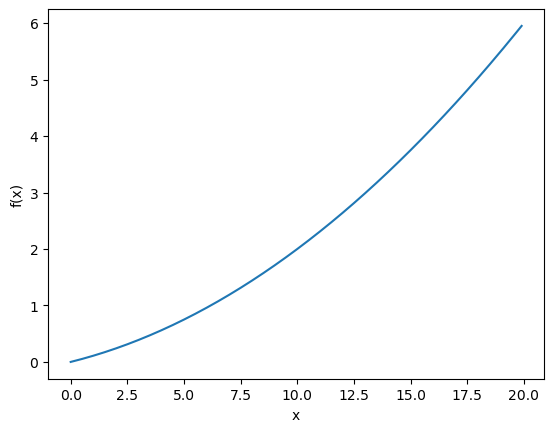

In [56]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다(20은 미포함)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [57]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


- 이렇게 계산한 미분 값이 $x$에 대한 $f(x)$의 변화량 즉, 함수의 기울기
- $f(x) = 0.01x^2+0.1x$의 해석적 해는 $\frac{df(x)}{dx}=0.02x+0.1$이다, 그래서 $x$가 5와 10일 때의 진정한 미분은 차례대로 0.2와 0.3이다, 실제로 같은 값이라고 해도 될 만큼 그 오차가 매우 작음을 알 수 있다

### 편미분
- 인수들의 제곱 합을 계산하는 단순한 식이지만 앞의 예와 달리 변수가 2개
- $f(x_0,x_1)=x^2_0+x^2_1$

In [58]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

- 인수 x는 넘파이 배열로 가정
- 넘파이 배열의 각 원소를 제곱하고 그 합을 구하는 간단한 구현
- 편미분 = 변수가 여럿인 함수에 대한 미분, 식으로 $\frac{\partial f}{\partial x_0}$나 $\frac{\partial f}{\partial x_1}$처럼 쓴다
- 문제 1 : $x_0 = 3, x_1 = 4$일 때, $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$을 구해라

In [59]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2

numerical_diff(function_tmp1, 3.0)

6.00000000000378

- 문제 2 : $x_0 = 3, x_1 = 4$일 때, $x_1$에 대한 편미분 $\frac{\partial f}{\partial x_1}$를 구해라

In [60]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

- 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다
- 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다
- 목표 변수를 제외한 나머지를 특정 값에 고정하기 위해서 새로운 함수를 정의하고 그 함수에 대해 그동한 사용한 수치 미분 함수를 적용하여 편미분을 구한 것

## 기울기
- $x_0$와 $x_1$의 편미분을 동시에 계산할 때 $(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1})$처럼 모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 한다

In [61]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같고 그 원소가 모두 0인 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

- f는 함수, x는 넘파이 배열이므로 넘파이 배열 x의 각 원소에 대해서 수치 미분을 구한다

In [62]:
# 세 점 (3, 4), (0, 2), (3, 0)의 각 점에서의 기울기
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


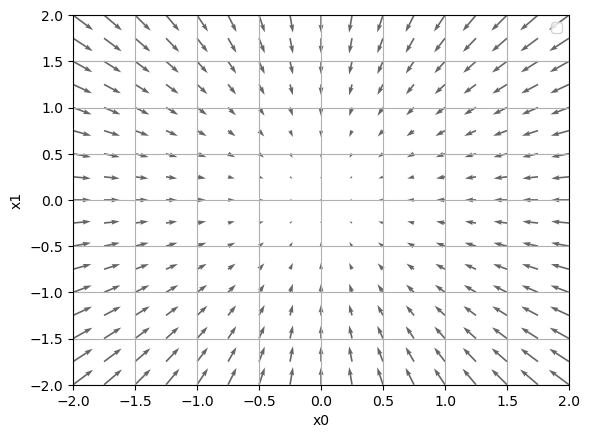

In [63]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

- 기울기 결과에 마이너스를 붙인 벡터 그림
- 기울기는 함수의 가장 낮은 장소(최솟값)을 가르킴, 가장 낮은 곳에서 멀어질수록 화살표의 크기가 커진다
- 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향

### 경사법(경사 하강법)
- 기계학습 문제 대부분이 학습 단계에서 최적의 매개변수를 찾아내듯이 신경망 역시 최적의 매개변수(가중치와 편향)를 학습 시에 찾아야 한다
- 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값
- 일반적인 문제의 손실 함수는 매우 복잡하고 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지를 짐작할 수 없다, 이런 상황에서 기울기를 잘 이용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는 것이 경사법
- 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표는 기울기
- 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지는 보장할 수 없다, 실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분
- 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있다
- 최솟값이 되는 장소를 찾는 문제에서는 기울기 정보를 단서로 나아갈 방향을 정해야 한다
- 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하고 이동한 곳에서 기울기를 구한 후 다시 기울어진 방향으로 나아가기를 반복한다, 이렇게 해서 함수의 값을 점차 줄이는 것이 경사법이다
- 경사법은 기계학습을 최적화하는 데 흔히 쓰는 방법이다, 신경망에서 특히 경사법을 많이 사용한다
- 경사법 수식
    - $x_0=x_0-\eta\frac{\partial f}{\partial x_0}$
    - $x_1=x_1-\eta\frac{\partial f}{\partial x_1}$
    - $\eta$는 갱신하는 양을 뜻하고 이를 신경망 학습에서는 학습률이라고 한다, 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률
- 변수의 값을 갱신하는 단계를 여러 번 반복하면서 서서히 함수의 값을 줄이는 것, 변수의 수가 달라져도 같은 식(각 변수의 편미분 값)으로 갱신하게 된다
- 학습률 값은 0.01이나 0.001 등 미리 특정 값으로 정해두어야 하는데 일반적으로 이 값이 너무 크거나 작으면 좋은 장소를 찾아갈 수 없다
- 신경망 학습에서는 보통 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행한다

In [64]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

- 인수 f는 최적화하려는 함수, init_x는 초깃값, lr은 learning rate를 뜻하는 학습률, step_num은 경사법에 따른 반복 횟수
- 함수의 기울기는 numerical_gradient(f, x)로 구하고, 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복
- 문제: 경사법으로$f(x_0, x_1)=x\frac{2}{0}+x\frac{2}{1}$의 최솟값을 구하라

In [65]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

- 0.0에 가까운 최종 결과, 경사법으로 거의 정확한 결과를 얻은 것

In [66]:
# 학습률이 너무 큰 예 : lr = 10.0
init_x = np.array([-3.0, 4,0])
print(gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100))

# 학습률이 너무 작은 예 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100))

[-2.58983747e+13 -1.29524862e+12  0.00000000e+00]
[-2.99999994  3.99999992]


- 학습률이 크면 너무 큰 값, 작으면 갱신되지 않은 채 끝난다
- 학습률 같은 매개변수를 하이퍼파라미터라고 하며, 가중치와 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수
- 신경망의 가중치 매개변수는 훈련 데이터와 학습 알고리즘에 의해서 자동으로 획득되나 학습률 같은 하이퍼파라미터는 직접 설정해야 하는 매개변수
- 일반적으로 하이퍼파라미터들은 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 한다

### 신경망에서의 기울기
- 신경망 학습에서도 기울기를 구해야 한다, 여기서 말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기다
- 형상이 2*3, 가중치가 $W$, 손실 함수가 $L$인 신경망일 경우 경사는 $\frac{\partial L}{\partial W}$
- 수식은 $W=\begin{pmatrix}w_{11}&w_{12}&w_{13}\\w_{21}&w_{22}&w_{23}\\ \end{pmatrix} \\ \quad\quad\frac{\partial L}{\partial W}=\begin{pmatrix}\frac{\partial L}{\partial W_{11}}&\frac{\partial L}{\partial W_{12}}&\frac{\partial L}{\partial W_{13}} \\ \frac{\partial L}{\partial W_{21}}&\frac{\partial L}{\partial W_{22}}&\frac{\partial L}{\partial W_{23}}\\ \end{pmatrix}$
    - $\frac{\partial L}{\partial W}$은 각 원소의 각각의 원소에 관한 편미분, 1행 1번째 원소인 $\frac{\partial L}{\partial W}$은 $w_{11}$을 조금 변경했을 때 손실 함수 $L$이 얼마나 변화하느냐를 나타낸다, 여기서 중요한 것은 $\frac{\partial L}{\partial W}$의 형상이 $W$와 같다는 것, 실제로 $W$와 $\frac{\partial L}{\partial W}$의 형상은 모두 2*3

In [67]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
    
        return loss

- simpleNet 클래스는 형상이 2*3인 가중치 매개변수 하나를 인스턴스 변수로 갖는다
- 메서드는 2개인데, 하나는 예측을 수행하는 predict(x)이고, 다른 하나는 손실 함수의 값을 구하는 loss(x, t)이다, 여기에서 인수 x는 데이터, t는 정답 레이블

In [68]:
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p))

t = np.array([0, 0, 1])
print(net.loss(x, t))

[[ 0.38145864  0.17621868 -0.52151792]
 [-0.65050416  1.05279493 -0.13249859]]
[-0.35657856  1.05324665 -0.43215948]
1
1.871073460060705


- numerical_gradient(f, x)으로 기울기를 구할 수 있다

In [69]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.09962726  0.40799749 -0.50762475]
 [ 0.14944089  0.61199623 -0.76143712]]


- nemerical_gradient(f, x)의 인수 f는 함수, x는 함수 f의 인수, net.W를 인수로 받아 손실 함수를 계산하는 함수 f
- dW는 numerical_gradient(f, net.W)의 결과로 2*3의 2차원 배열

In [70]:
f = lambda w: net.loss(x, t)
df = numerical_gradient(f, net.W)
df

array([[ 0.09962726,  0.40799749, -0.50762475],
       [ 0.14944089,  0.61199623, -0.76143712]])

- 신경망의 기울기를 구한 다음에는 경사법에 따라 가중치 매개변수를 갱신하기만 하면 된다

## 학습 알고리즘 구현하기
- 신경망 학습의 절차
    - 전제
        - 신경망에는 적응 가능한 가중치와 편향이 있다, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라 한다
    - 1단계 - 미니배치
        - 훈련 데이터 중 일부를 무작위로 가져오는 걸 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표
    - 2단계 - 기울기 산출
        - 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다, 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다
    - 3단계 - 매개변수 갱신
        - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
    - 4단계 - 반복
        - 1~3단계를 반복
- 이는 경사 하강법으로 매개변수를 갱신하는 방법이며, 이때 데이터를 미니배치로 무작위로 선정하기 때문에 확률적 경사 하강법이라고 한다, 확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사 하강법이란느 의미


### 2층 신경망 클래스 구현

In [71]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화, 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 누런 수
        self.params = {} # 신경망의 매개변수를 보고나하는 딕셔너리 변수(인스턴스 변수)
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) # 1번째 층의 가중치
        self.params['b1'] = np.zeros(hidden_size) # 1번째 층의 편향
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) # 2번째 층의 가중치
        self.params['b2'] = np.zeros(output_size) # 2번째 층의 편향

    def predict(self, x): # 예측을 수행, 인수 x는 이미지 데이터
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t): # 손실 함수의 값, 인수 x는 이미지 데이터, t는 정답 레이블
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t): # 정확도
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t): # 가중치의 매개변수의 기울기
        loss_W = lambda W: self.loss(x, t)
        
        grads = {} # 기울기를 보관하는 딕셔너리 변수(nemerical_gradient() 메서드의 반환 값)
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])# 1번째 층의 가중치의 기울기
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])# 1번째 층의 편향의 기울기
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])# 1번째 층의 가중치의 기울기
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])# 1번째 층의 편향의 기울기
        
        return grads
    
    def gradient(self, x, t): # numerical_gradient의 성능 개선판
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [72]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)
# 신경망에 필요한 매개변수 저장

(784, 100)
(100,)
(100, 10)
(10,)


In [73]:
x = np.random.rand(100, 784) # 더미 입력 데이터
y = net.predict(x)
print(y)

[[0.10023383 0.0967144  0.09768998 0.10442465 0.10672169 0.09209233
  0.09499903 0.10024848 0.10863309 0.09824254]
 [0.10007182 0.09673517 0.0977444  0.10414177 0.10684646 0.09238617
  0.09476653 0.10000493 0.10853347 0.09876928]
 [0.10007297 0.09653798 0.09800127 0.10465874 0.1068619  0.09200096
  0.09475186 0.10002271 0.10863051 0.09846109]
 [0.10013603 0.09658994 0.09801991 0.10478015 0.10681547 0.09210651
  0.09486418 0.09994656 0.10831566 0.0984256 ]
 [0.09996959 0.0966496  0.09835994 0.10452517 0.106935   0.09206706
  0.09482511 0.09982929 0.10834694 0.0984923 ]
 [0.1001053  0.09672017 0.09782007 0.10447452 0.10677288 0.09224698
  0.09462722 0.10013005 0.10847464 0.09862817]
 [0.10006094 0.09713973 0.09752706 0.10481535 0.10673749 0.09234875
  0.09453793 0.09982316 0.10836366 0.09864593]
 [0.10001083 0.09659391 0.0983008  0.10443416 0.10671399 0.09234359
  0.09459957 0.09981649 0.10856083 0.09862583]
 [0.10023712 0.09661228 0.09801701 0.10476394 0.10682664 0.09195472
  0.0945874 

In [74]:
x = np.random.rand(100, 784) # 더미 입력 데이터
t = np.random.rand(100, 10) # 더미 정답 레이블

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 미니배치 학습 구현하기
- 미니배치 학습이란 훈련 데이터 중 일부를 무작위로 꺼내고, 그 미니배치에 대해서 경사법으로 매개변수를 갱신하는 것

In [75]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

- 미니배치 100은 매번 60,000개의 훈련 데이터에서 임의로 100개의 데이터(이미지 데이터와 정답 레이블 데이터)를 추려낸 후 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신한다, 경사법에 의한 갱신 횟수(반복 횟수)를 10,000번으로 설정하고, 갱신할 때마다 훈련 ㅑ데이터에 대한 손실 함수를 계산하고, 그 값을 배열에 추가
- 학습 횟수가 늘어감녀서 손실 함수의 값이 줄어들면 학습이 잘 되고 있다는 뜻으로, 신경망의 가중치 매개변수가 서서히 데이터에 적응하고 있음을 의미한다

### 시험 데이터로 평가하기
- 오버피팅은 예를 들어 훈련 데이터에 포함된 이미지만 제대로 구분하고, 그렇지 않은 이미지는 식별할 수 없다는 뜻
- 에폭은 하나의 단위, 1에폭은 훈련 데이터를 모두 소진했을 때의 횟수에 해당, 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 소진한 게 된다, 이 경우 100회가 1에폭

train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.7955333333333333, 0.7991
train acc, test acc | 0.8753833333333333, 0.8795
train acc, test acc | 0.8971166666666667, 0.9012
train acc, test acc | 0.9070166666666667, 0.9095
train acc, test acc | 0.914, 0.915
train acc, test acc | 0.91795, 0.9227
train acc, test acc | 0.9228333333333333, 0.9254
train acc, test acc | 0.9265333333333333, 0.9276
train acc, test acc | 0.93065, 0.9311
train acc, test acc | 0.9334666666666667, 0.9332
train acc, test acc | 0.93585, 0.9354
train acc, test acc | 0.9382333333333334, 0.9376
train acc, test acc | 0.9400833333333334, 0.9388
train acc, test acc | 0.9423666666666667, 0.9399
train acc, test acc | 0.9441, 0.9419
train acc, test acc | 0.94545, 0.9427


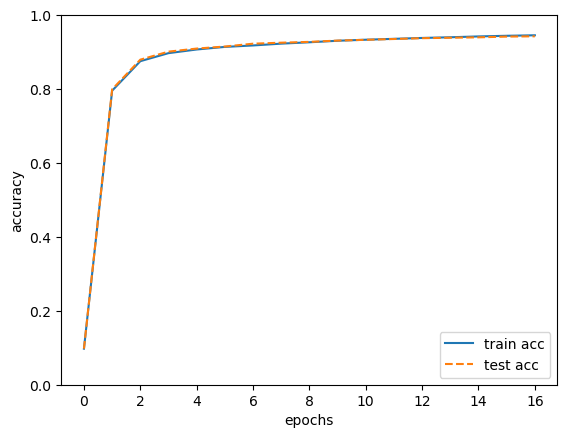

In [76]:
import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 1에폭마다 모든 훈련 데이터와 시험 데이터에 대한 정확도를 계산하고 기록
- 정확도를 1에폭마다 계산하는 이유는 for문 안에서 매번 계산하기에는 시간이 오래 걸리고, 또 그렇게까지 자주 기록할 필요도 없기 때문
- 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 좋아지면 오버피팅이 일어나지 않은 것, 오버피팅이 발생했을 경우 어느 순간 시험 데이터에 대한 정확도가 점차 떨어지기 시작한다

## 정리
- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다, 오차역전파법은 기울기를 고속으로 구할 수 있다

# 오차역전파법
- 오차역전파법을 풀어쓰면 오차를 역으로 전파하는 방법, 줄여서 역전파법, 역전파라고 쓰기도 한다

## 계산 그래프
- 계산 그래프는 계산 과정을 그래프로 나타낸 것, 여기에서의 그래프는 복수의 노드와 에지로 표현된다

### 계산 그래프로 풀다
- 문제1: 1개에 100원인 사과 2개를 샀습니다. 이때 지불 금액을 구하세요. 단, 소비세가 10% 부과됩니다
    - ![](fig_5-1.png)
    - ![](fig_5-2.png)
- 문제2: 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개 150원입니다. 소비세가10%일 때 지불 금액을 구하세요
    - ![](fig_5-3.png)

### 국소적 계산
- ![](fig_5-4.png)
    - 각 노드에서의 계산은 국소적 계산

### 왜 계산 그래프로 푸는가?
- 국소적 계산, 중간 계산 결과를 모두 보관 가능, 역전파를 통해 미분을 효율적으로 계산 가능
- ![](fig_5-5.png)
    - 국소적 미분 전달
    - 사과 가격에 대한 지불 금액의 미분 값은 2.2
- 순전파와 역전파를 활용해서 각 변수의 미분을 효율적으로 구할 수 있다

## 연쇄법칙
- 국소적 미분을 전달하는 원리는 연쇄법칙에 따른 것

### 계산 그래프의 역전파
- ![](fig_5-6.png)
    - 역전파의 계산 절차는 신호 $E$에 노드의 국소적 미분 $(\frac{\partial y}{\partial x})$을 곱한 후 다음 노드로 전달
    - 여기에서 국소적 미분은 순전파 때의 $y = f(x)$ 계산의 미분을 구한다는 것이며, 이는 $x$에 대한 $y$의 미분 $(\frac{\partial y}{\partial x})$을 구한다는 뜻, 가령 $y = f(x) = x^2$이라면 $\frac{\partial y}{\partial x} = 2_x$가 되고 이 국소적 미분을 상류에서 전달된 값(여기서는 $E$)에 곱해 앞쪽 노드로 전달

### 연쇄법칙이란?
- 합성 함수란 여러 함수로 구성된 함수 
